### Task Evaluation
Analyzing multiple bank details to detect credit card fraud.

1. Data Collection:
The dataset is successfully loaded using the pd.read_excel() function. The dataset is now stored in a DataFrame, and its structure is inspected. This allows us to ensure that the data is correctly loaded and contains the expected columns.

2. Initial Checks:
We use data.info() to get a summary of the dataset, including the total number of entries, column names, data types, and non-null counts. The first few rows are displayed using data.head(), providing an overview of the dataset's contents. This step ensures we understand the dataset's structure, and it highlights potential issues like missing values.

3. Null Value Detection:
We use data.isnull().sum() to check for missing values. Identifying null values is critical for deciding how to handle them in the next steps, ensuring data integrity before further processing.

Make Necessary Imports

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving creditcard.xlsx to creditcard.xlsx


In [3]:
import pandas as pd

# Use pd.read_excel instead of pd.read_csv for excel files
data = pd.read_excel('creditcard.xlsx')

#### Data Information

In [4]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                

In [5]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   ID  LIMIT_BAL     SEX  EDUCATION  MARRIAGE  AGE  \
0   1      20000  Female  Secondary   Married   24   
1   2     120000  Female  Secondary  Divorced   26   
2   3      90000  Female  Secondary  Divorced   34   
3   4      50000  Female  Secondary   Married   37   
4   5      50000    Male  Secondary   Married   57   

                                             PAY_0  \
0                        Payment was 2 months late   
1           Payment made on time (by the due date)   
2  Account had no outstanding balance (fully paid)   
3  Account had no outstanding balance (fully paid)   
4           Payment made on time (by the due date)   

                                             PAY_2  \
0                        Payment was 2 months late   
1                        Payment was 2 months late   
2  Account had no outstanding balance (fully paid)   
3  Account had no outstanding balance (fully paid)   
4  Account had no outstanding balance (fully paid)

In [6]:
print("\nNull value counts per column:")
print(data.isnull().sum())


Null value counts per column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


#### Handling Null Values

In [7]:
def fill_missing():
    # handling all missing values.
    for col in data.columns:
        # missing values in numerical columns are replaced with mean
        if data[col].dtype == float:
            mean=data[col].mean()
            data[col]= data[col].fillna(mean)
        # missing values in discrete columns are replaced with median
        if data[col].dtype == int:
            median=data[col].median()
            data[col]= data[col].fillna(median)
        # missing values in categorical columns are replaced with mode
        if data[col].dtype == object:
            mode=data[col].mode().iloc[0]
            data[col]= data[col].fillna(mode)
    return data
data=fill_missing()

In [8]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [9]:
data.shape

(30000, 25)

In [10]:
data.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,object
EDUCATION,object
MARRIAGE,object
AGE,int64
PAY_0,object
PAY_2,object
PAY_3,object
PAY_4,object


#### Seperating Both Numerical and Categorical Columns

In [11]:
def rename_feature(data,column_mapping):
    # This function changes names of columns
    # It takes two inputs: data and a dictionary where keys are old column names and values are new column names.
    return data.rename(columns=column_mapping,inplace=True)

In [12]:
def sep_col(data):
    # this function separates categorical and numerical columns of our data.
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns

categorical_columns,numerical_columns=sep_col(data)

In [13]:
categorical_columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')

In [14]:
numerical_columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Encoding the Values

Scale numerical data to a standard range.

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [16]:
def encode():
    # this function standardize all categorical columns using builtin Python sklearn's LabelEncoder.
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data

data=encode()

In [17]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,5,1,24,4,4,2,2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,5,0,26,2,4,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,5,0,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,5,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,5,1,57,2,0,2,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,2,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,2,0,43,2,2,2,2,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,5,0,37,6,5,4,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,2,1,41,3,2,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Standardizing the Data using StandardScaler

Scale numerical data to a standard range.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
def standardize():
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
data=standardize()

In [19]:
def drop_col(numerical_columns,col):
    # This function removes the irrelevant column from the subdataset numerical_columns.
    numerical_columns=numerical_columns.drop(col)
    return numerical_columns

# We are dropping 'N_Days' as it is not a relevant feature.
numerical_columns=drop_col(numerical_columns,'ID')

### EDA

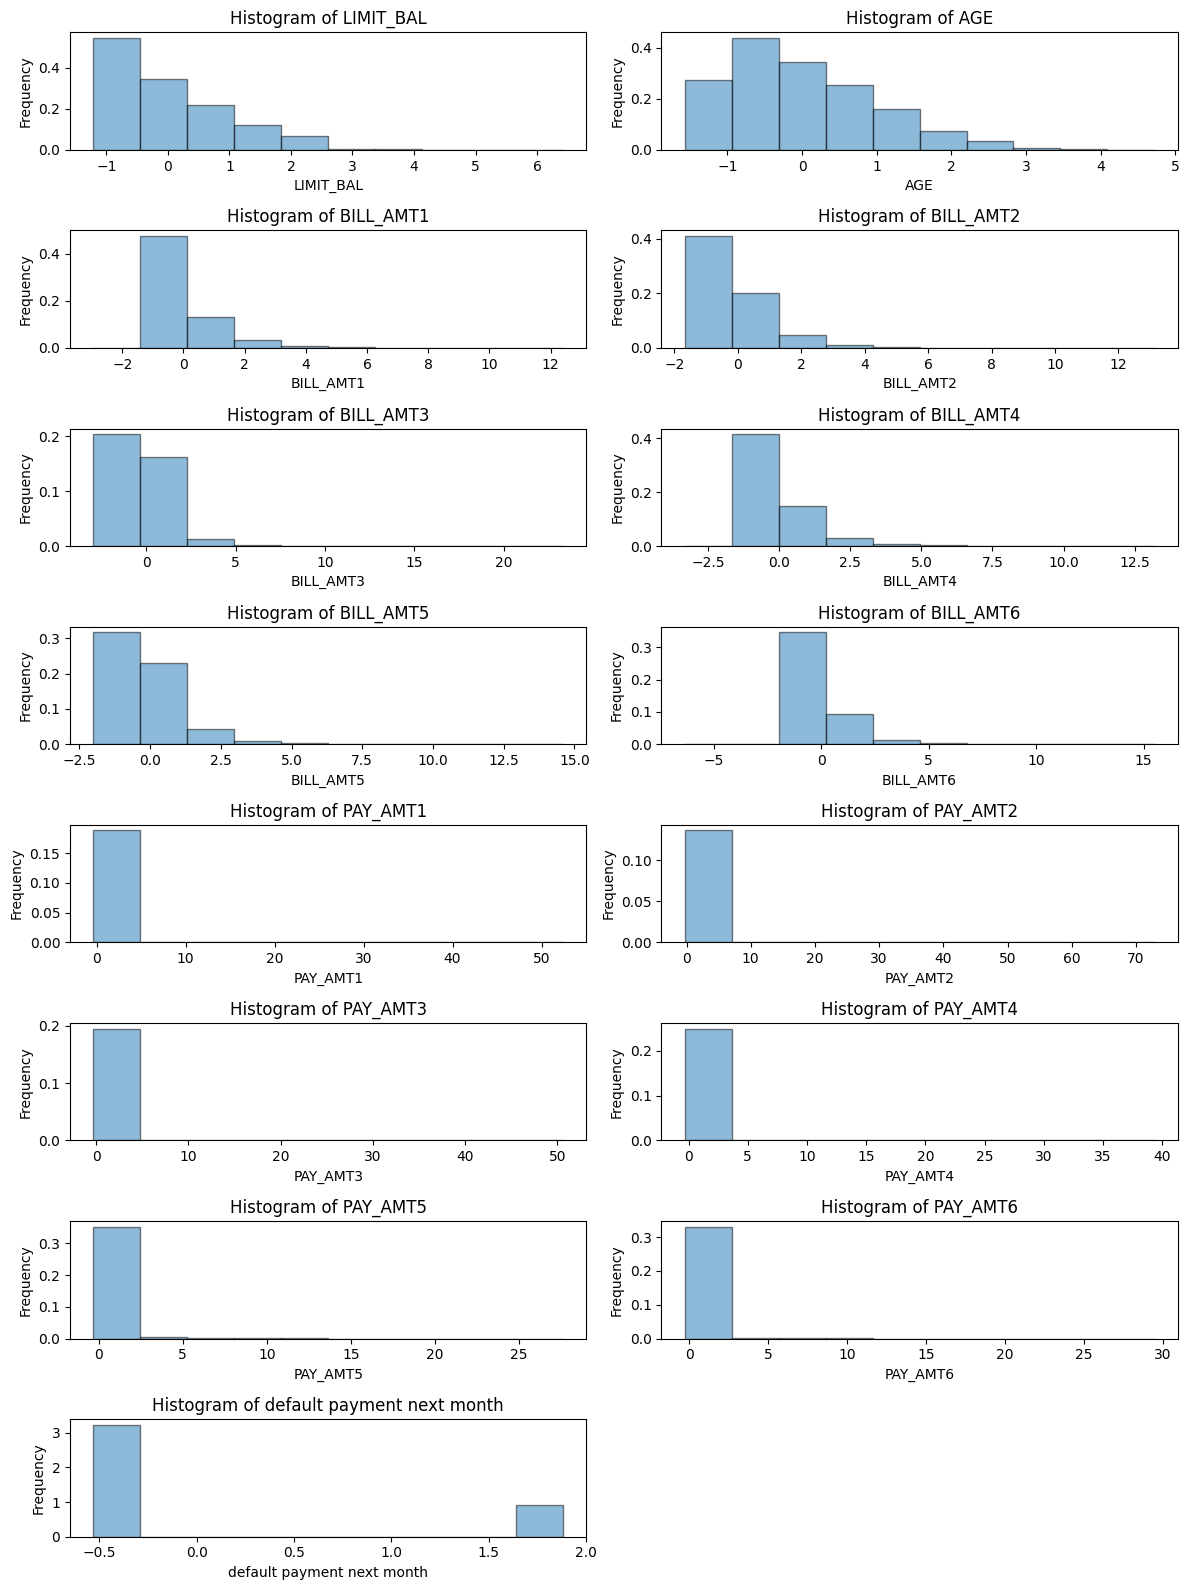

In [20]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def plot_histogram():
    # This function plots histograms of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjusting rows based on columns to display as subplots.

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].hist(data[col], density=True, alpha=0.5, edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histogram()

#### General Analysis of Histograms:

Distribution Shapes:

Many of the histograms, such as those for BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, and BILL_AMT6, exhibit right-skewness. This means they have a longer tail on the right side, indicating a higher frequency of lower values and a few larger values. Right-skewness can be further addressed using techniques like logarithmic transformations to improve model performance if needed.
LIMIT_BAL shows a slightly right-skewed distribution as well.
AGE appears to have a more or less normal distribution, centered around a specific age range.
The histograms for PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, and PAY_AMT6 are also right-skewed, similar to the BILL_AMT features.
Central Tendency and Spread:

The histograms provide a visual representation of the central tendency (mean, median, mode) and spread (variance, standard deviation) of your data.
For instance, the AGE histogram's peak indicates the most frequent age range.
The spread of the histograms can be observed by how wide or narrow they are. Wider histograms suggest greater variability in the data.
Potential Outliers:

Observing the histograms can help identify potential outliers, which are data points significantly different from the rest.
For example, in the right-skewed histograms like BILL_AMT1, the longer tail on the right could indicate potential outliers with extremely high bill amounts.

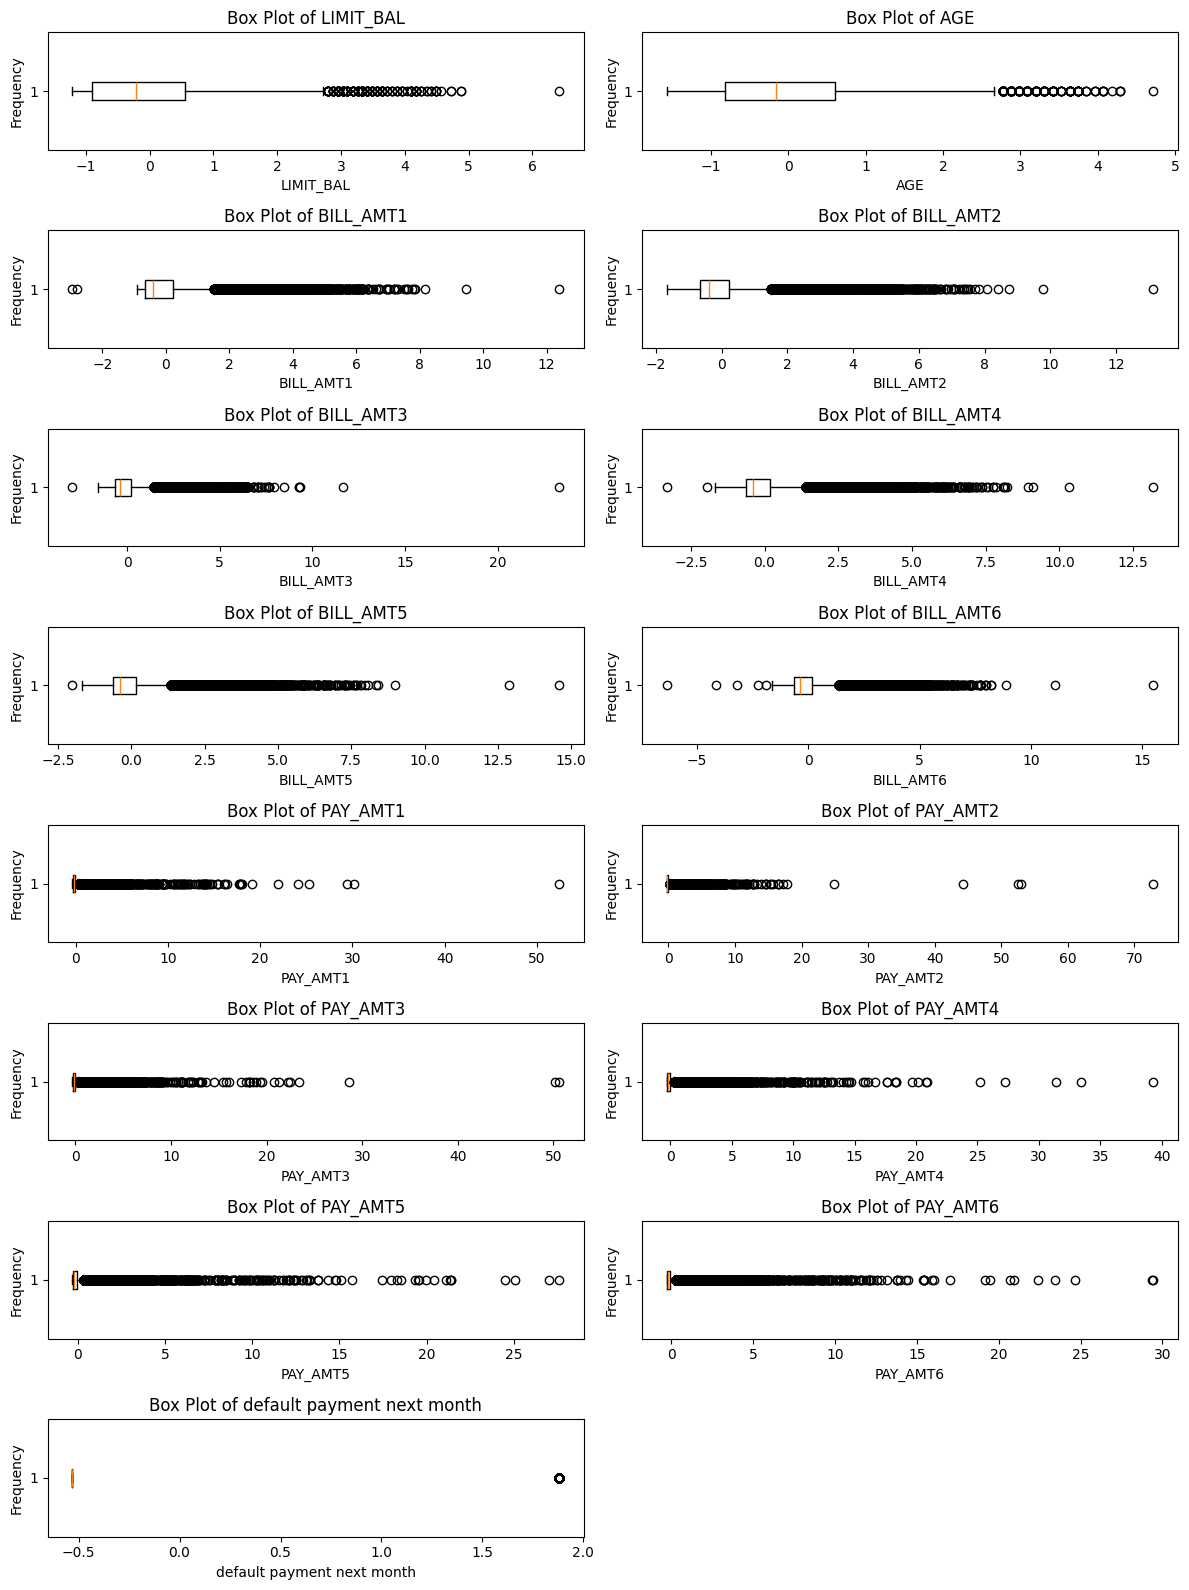

In [21]:
def plot_boxplot():
    # This function plots the BoxPlots of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjust rows based on the number of numerical columns

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].boxplot(data[col],vert=False)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Box Plot of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplot()

#### General Observations of the BoxPlots

Outliers: Many of the box plots show the presence of outliers, especially those for BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, and PAY_AMT6. These outliers are data points that are significantly different from the rest of the data.

Distribution: The box plots provide insights into the distribution of your data.
Some features have a roughly symmetric distribution, where the median is approximately in the center of the box.
Others have a skewed distribution, where the median is closer to one end of the box.
The presence of outliers can also affect the shape of the distribution.

Central Tendency and Spread: The box plots also show the central tendency (median) and spread (interquartile range) of the data.
The median is represented by the line inside the box.
The interquartile range (IQR) is represented by the length of the box.
Specific Observations

BILL_AMT features: All the BILL_AMT features show a similar pattern of right-skewness and presence of outliers on the higher end. This indicates that there are a few customers with very high bill amounts. This might be worth investigating further for debt analysis and potential risk assessment.
PAY_AMT features: The PAY_AMT features also show a right-skewed distribution with outliers, but the presence of outliers and skewness is less pronounced compared to BILL_AMT features.

AGE: The AGE feature has a slightly right-skewed distribution with outliers on the higher end, indicating some older customers in the dataset.
LIMIT_BAL: The LIMIT_BAL feature also shows a slightly right-skewed distribution with outliers on the higher end.

In [22]:
def df_num_col(data):
    # The purpose of this fucntion is to create a dataframe of numerical columns of our data.
    df=data
    return df
df=df_num_col(data[numerical_columns])

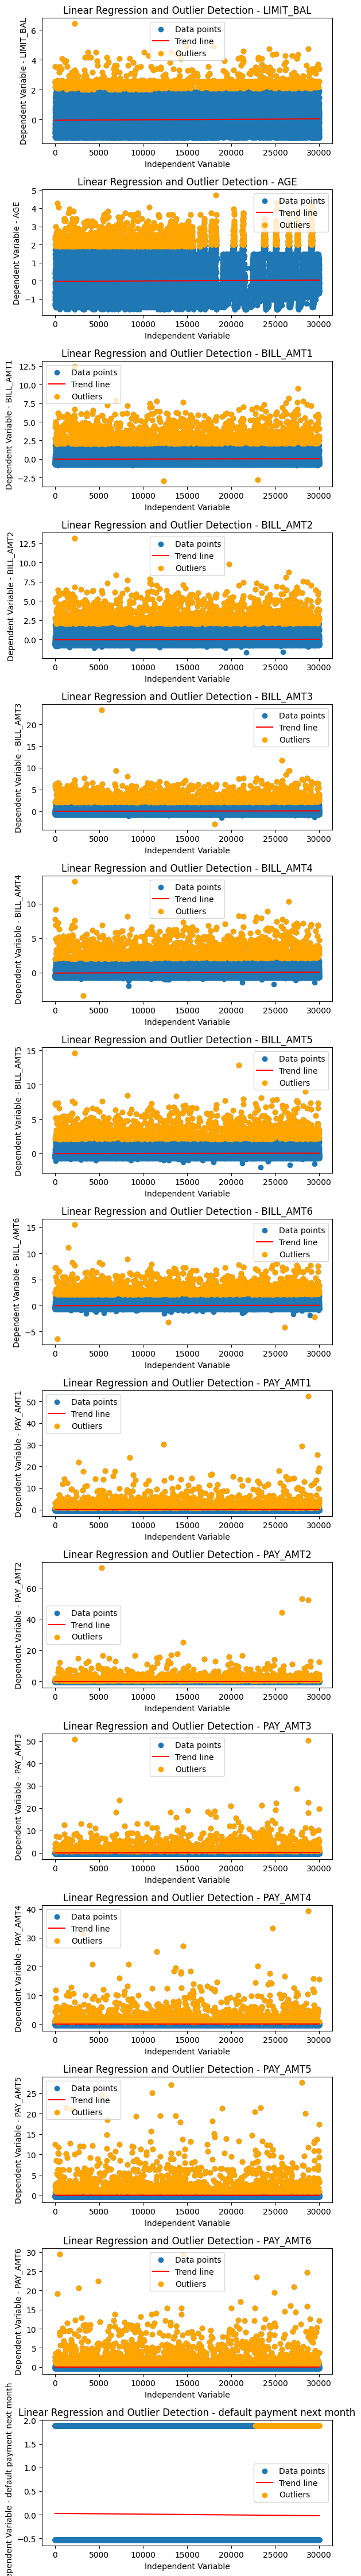

In [23]:
def detect_outl(df):
    # This function creates scatter plots of all numerical variables that identifies each point as
    # either a data point or an outlier
    import numpy as np
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(6, 3 * num_plots))


    for i, col in enumerate(numerical_columns):
        X = np.arange(len(df)).reshape(-1, 1)  # Independent variable
        y = df[col].values.reshape(-1, 1)  # Dependent variable

        # Linear regression is performed using numpy.
        coefficients = np.polyfit(X.flatten(), y.flatten(), 1)
        trend_line = np.polyval(coefficients, X.flatten())

        # Residuals are calculated.
        residuals = y - trend_line.reshape(-1, 1)

        # A threshold is set based on the 95th percentile
        # Quantiles are used to set the threshold.
        # Outliers are set as those data points that are beyond the 95th percentile of the residuals.
        threshold = np.percentile(np.abs(residuals), 95)

        # Outliers are identified based on residuals.
        outlier_mask = np.abs(residuals) > threshold
        outliers = df[outlier_mask.flatten()]

        # PData points and the trend line is plotted.
        axes[i].scatter(X, y, label='Data points')
        axes[i].plot(X, trend_line, color='red', label='Trend line')
        axes[i].scatter(X[outlier_mask], y[outlier_mask], color='orange', label='Outliers')
        axes[i].set_xlabel('Independent Variable')
        axes[i].set_ylabel(f'Dependent Variable - {col}')
        axes[i].set_title(f'Linear Regression and Outlier Detection - {col}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

detect_outl(df)

The Outliers have been spotted with these scatter plots

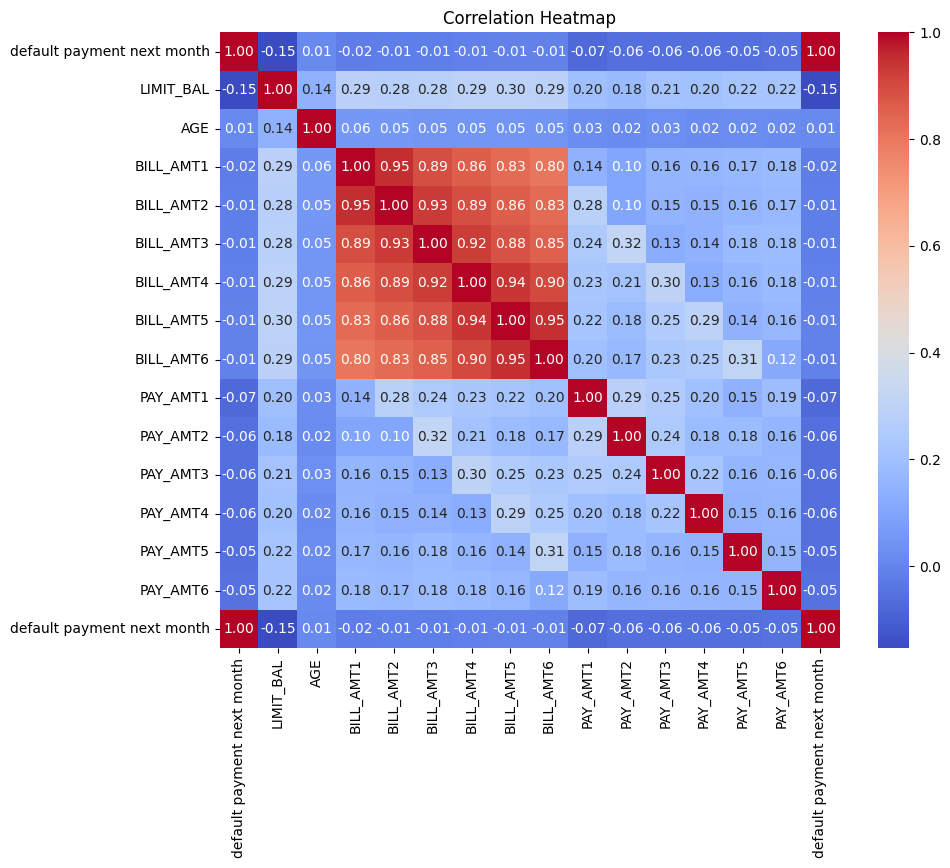

In [24]:
 def feature_eng(target,df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng('default payment next month',numerical_columns.to_list())

Best RFFS Features have been selected by carefully examining the heat map. Here default payment next month (the target varibale) is deeply correlated with Bill_AMT1-6

In [25]:
features_to_keep = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [26]:
fs_data=data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default payment next month']]

In [27]:
fs_data

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
0,-0.64,-0.65,-0.67,-0.67,-0.66,-0.65,1.88
1,-0.66,-0.67,-0.64,-0.62,-0.61,-0.60,1.88
2,-0.30,-0.49,-0.48,-0.45,-0.42,-0.39,-0.53
3,-0.06,-0.01,0.03,-0.23,-0.19,-0.16,-0.53
4,-0.58,-0.61,-0.16,-0.35,-0.35,-0.33,-0.53
...,...,...,...,...,...,...,...
29995,1.87,2.02,2.33,0.70,-0.15,-0.38,-0.53
29996,-0.67,-0.67,-0.63,-0.53,-0.58,-0.65,-0.53
29997,-0.65,-0.64,-0.64,-0.35,-0.32,-0.33,1.88
29998,-0.72,0.41,0.42,0.15,-0.47,0.17,1.88


In [28]:
pip install lightgbm

In [29]:
#we use lightgbm for data undersampling.
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


# Load your dataset
data = pd.read_excel('creditcard.xlsx')

# Define the features and target variable
features_to_keep = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
target_variable = 'default payment next month'

# Filter the dataset
filtered_data = data[features_to_keep + [target_variable]]

# Split into features (X) and target (y)
X = filtered_data[features_to_keep]
y = filtered_data[target_variable]

# Split data into training and testing sets (without class imbalance handling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Initialize LightGBM classifier with de-optimized parameters
lgbm_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1, n_estimators=50, learning_rate=0.2, max_depth=3, num_leaves=10)

# Train the LightGBM model on the resampled data
lgbm_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_pred_train_lgbm = lgbm_clf.predict(X_train_resampled) # Predict on resampled training data
y_pred_test_lgbm = lgbm_clf.predict(X_test)

# Calculate accuracy for train and test data
accuracy_train_lgbm = accuracy_score(y_train_resampled, y_pred_train_lgbm) # Evaluate on resampled training data
accuracy_test_lgbm = accuracy_score(y_test, y_pred_test_lgbm)

# Additional evaluation metrics for the test set
y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]
precision_lgbm = precision_score(y_test, y_pred_test_lgbm)
recall_lgbm = recall_score(y_test, y_pred_test_lgbm)
f1_lgbm = f1_score(y_test, y_pred_test_lgbm)
auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm))

# Display train and test set metrics for LightGBM model
print("\nLightGBM Model Train Set Accuracy (Resampled Data): {:.2f}".format(accuracy_train_lgbm))
print("LightGBM Model Test Set Accuracy: {:.2f}".format(accuracy_test_lgbm))

# Display the evaluation metrics for the test set
print("\nLightGBM Model Test Set Metrics:")
print(f"Precision: {precision_lgbm:.2f}")
print(f"Recall: {recall_lgbm:.2f}")
print(f"F1-Score: {f1_lgbm:.2f}")
print(f"AUC-ROC: {auc_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")

# Print Classification Report for LightGBM Model
print("\nClassification Report (LightGBM Model):")
print(classification_report(y_test, y_pred_test_lgbm))

[LightGBM] [Info] Number of positive: 16355, number of negative: 16355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 32710, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

## What this block of code is doing:
1. Import Libraries: It imports necessary libraries like lightgbm for the model, pandas for data manipulation, numpy for numerical operations, and various modules from sklearn and imblearn for model selection, evaluation, and handling imbalanced data.
2. Load Dataset: It loads data from an Excel file named creditcard.xlsx into a pandas DataFrame.
3. Define Features and Target: It specifies the list of features (features_to_keep) and the target variable (target_variable) for the model.
Filter Dataset: It creates a new DataFrame filtered_data containing only the selected features and the target variable.
4. Split Features and Target: It separates the filtered data into feature matrix X and target vector y.
5. Split Data (Train/Test): It splits the data into training and testing sets using train_test_split. The test_size is set to 0.3 (30% for testing), random_state ensures reproducibility, and stratify=y ensures that the proportion of the target variable is the same in both training and testing sets.
6. Apply SMOTE: It applies the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to the training data (X_train, y_train) to oversample the minority class. This helps to address class imbalance by creating synthetic samples of the minority class. The resampled data is stored in X_train_resampled and y_train_resampled.
7. Initialize LightGBM Classifier: It initializes a LightGBM classifier (lgb.LGBMClassifier) with specific hyperparameters (n_estimators, learning_rate, max_depth, num_leaves) and random_state for reproducibility. n_jobs=-1 uses all available CPU cores.
8. Train LightGBM Model: It trains the LightGBM model on the resampled training data (X_train_resampled, y_train_resampled).
Make Predictions: It makes predictions on both the resampled training data (X_train_resampled) and the original test data (X_test).
9. Calculate Accuracy: It calculates the accuracy of the model on both the resampled training data and the test data.
10. Calculate Additional Metrics: It calculates various evaluation metrics for the test set, including precision, recall, F1-score, AUC-ROC, and RMSE. These metrics provide a more comprehensive evaluation of the model's performance, especially in the presence of class imbalance.
11. Display Metrics: It prints the calculated accuracy for the train and test sets, as well as the additional evaluation metrics for the test set.
12. Print Classification Report: It prints a classification report, which provides a detailed summary of the model's performance for each class, including precision, recall, F1-score, and support

### Manual Splitting with Light GBM resulted in 58% accuracy, this can further be improved with more hyper parameter tuning.